In [33]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
crime_df = pd.read_csv('Violent_Crime_MD_1975_Present.csv')
crime_df

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Worcester County,2016,51255,3,17,39,93,289,1514,32,...,563.8,2953.9,62.4,201.8,14.0,45.3,-8.3,6.5,-2.5,15.0
1100,Worcester County,2017,51408,2,26,43,106,220,1514,39,...,427.9,2945.1,75.9,-33.5,52.5,9.9,13.6,-24.1,-0.3,21.5
1101,Worcester County,2018,51304,0,12,24,88,215,1178,34,...,419.1,2296.1,66.3,-100.0,-53.8,-44.1,-16.8,-2.1,-22.0,-12.6
1102,Worcester County,2019,51606,0,12,24,94,186,1086,30,...,360.4,2104.4,58.1,0.0,-0.6,-0.6,6.2,-14.0,-8.3,-12.3


In [35]:
crime_df.index.stop

1104

In [36]:
print(len(crime_df.columns))
crime_df.columns

38


Index(['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY',
       'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL',
       'PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT',
       'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS',
       'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE',
       'OVERALL CRIME RATE PER 100,000 PEOPLE',
       'OVERALL PERCENT CHANGE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PER 100,000 PEOPLE',
       'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PER 100,000 PEOPLE',
       'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE',
       'ROBBERY PER 100,000 PEOPLE', 'AGG. ASSAULT PER 100,000 PEOPLE',
       'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE',
       'M/V THEFT PER 100,000 PEOPLE',
       'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
       'RAPE RATE PE

In [37]:
crime_df.dtypes

JURISDICTION                                              object
YEAR                                                       int64
POPULATION                                                 int64
MURDER                                                     int64
RAPE                                                       int64
ROBBERY                                                    int64
AGG. ASSAULT                                               int64
B & E                                                      int64
LARCENY THEFT                                              int64
M/V THEFT                                                  int64
GRAND TOTAL                                                int64
PERCENT CHANGE                                           float64
VIOLENT CRIME TOTAL                                        int64
VIOLENT CRIME PERCENT                                    float64
VIOLENT CRIME PERCENT CHANGE                             float64
PROPERTY CRIME TOTALS    

In [38]:
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False).str.replace(',','')
crime_df['county'] = crime_df['jurisdiction'].str.replace(r'\s+County$', '', regex=True)

# Drop 'jurisdiction' and reorder columns
cols = crime_df.columns.tolist()
cols.remove('jurisdiction')
cols.insert(0, cols.pop(cols.index('county')))
crime_df = crime_df[cols]


crime_df.columns

Index(['county', 'year', 'population', 'murder', 'rape', 'robbery',
       'agg_assault', 'b_&_e', 'larceny_theft', 'm/v_theft', 'grand_total',
       'percent_change', 'violent_crime_total', 'violent_crime_percent',
       'violent_crime_percent_change', 'property_crime_totals',
       'property_crime_percent', 'property_crime_percent_change',
       'overall_crime_rate_per_100000_people',
       'overall_percent_change_per_100000_people',
       'violent_crime_rate_per_100000_people',
       'violent_crime_rate_percent_change_per_100000_people',
       'property_crime_rate_per_100000_people',
       'property_crime_rate_percent_change_per_100000_people',
       'murder_per_100000_people', 'rape_per_100000_people',
       'robbery_per_100000_people', 'agg_assault_per_100000_people',
       'b_&_e_per_100000_people', 'larceny_theft_per_100000_people',
       'm/v_theft_per_100000_people',
       'murder__rate_percent_change_per_100000_people',
       'rape_rate_percent_change_per_10000

In [39]:
crime_df_latest = crime_df[crime_df['year'] == crime_df['year'].max()]

# Drop rows with missing counties or crime rates
crime_df_latest = crime_df_latest.dropna(subset=['county', 'violent_crime_rate_per_100000_people'])

In [40]:
num_counties = crime_df_latest['county'].nunique()
num_features = len(crime_df_latest.columns)
print(f"\nNumber of counties: {num_counties}")
print(f"Number of features: {num_features}")



Number of counties: 24
Number of features: 38


In [45]:
county_crime_df = crime_df_latest.groupby('county', as_index=False).agg({
    'violent_crime_rate_per_100000_people': 'mean',
    'property_crime_rate_per_100000_people': 'mean',
    'population': 'sum'
})

display(county_crime_df.describe())

# Highest violent crime rate
highest_crime = county_crime_df.sort_values('violent_crime_rate_per_100000_people', ascending=False).head(1)

# Lowest violent crime rate
lowest_crime = county_crime_df.sort_values('violent_crime_rate_per_100000_people').head(1)

display("Highest crime county:\n", highest_crime)
display("\nLowest crime county:\n", lowest_crime)


,violent_crime_rate_per_100000_people,property_crime_rate_per_100000_people,population
count,24.000000,24.000000,2.400000e+01
mean,330.462500,1404.700000,2.523251e+05
std,303.607782,642.988813,3.067992e+05
min,111.300000,653.800000,1.927300e+04
25%,170.075000,958.725000,4.712825e+04
50%,273.900000,1287.400000,1.089135e+05
75%,335.275000,1727.075000,2.785028e+05
max,1610.600000,3171.500000,1.055918e+06


'Highest crime county:\n'

,county,violent_crime_rate_per_100000_people,property_crime_rate_per_100000_people,population
3,Baltimore City,1610.6,3171.5,588594


'\nLowest crime county:\n'

,county,violent_crime_rate_per_100000_people,property_crime_rate_per_100000_people,population
6,Carroll,111.3,705.8,168032


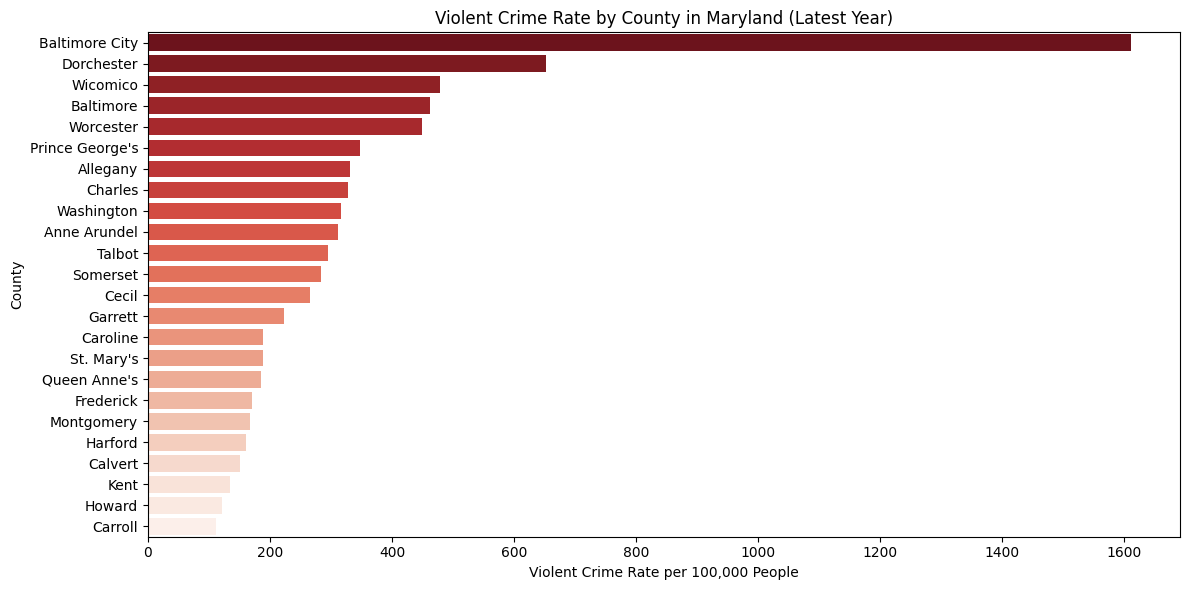

In [48]:
county_crime_df_sorted = county_crime_df.sort_values('violent_crime_rate_per_100000_people', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=county_crime_df_sorted,
    x='violent_crime_rate_per_100000_people',
    y='county',
    hue='county',
    dodge=False,
    legend=False,
    palette='Reds_r'
)

plt.xlabel("Violent Crime Rate per 100,000 People")
plt.ylabel("County")
plt.title("Violent Crime Rate by County in Maryland (Latest Year)")
plt.tight_layout()
plt.show()
